In [23]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import sklearn
print(sklearn.__version__)

1.4.0


In [25]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_feature = iris.data
iris_label = iris.target

print(f'iris feature: {iris_feature[:3]}')
print(f'iris label: {iris_label[:3]}')

iris feature: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
iris label: [0 0 0]


In [26]:
import pandas as pd

iris_df = pd.DataFrame(data=iris_feature, columns=iris.feature_names)
iris_df['label'] = iris_label

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    ## label column 삭제
    iris_df.drop('label', axis=1),
    iris_df['label'],
    test_size=0.2,
    random_state=1
)

X_train.shape, X_test.shape

((120, 4), (30, 4))

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [29]:
pred = dt_clf.predict(X_test)
pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [30]:
from sklearn.metrics import accuracy_score
print(f'예측 정확도: {accuracy_score(y_test, pred)}')

예측 정확도: 0.9666666666666667


In [31]:
X = iris.data
y = iris.target

print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [32]:
test_size = 30

X_test = X[: test_size]
y_test = y[: test_size]

print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [33]:
X_train = X[test_size: ]
y_train = y[test_size: ]

print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


In [34]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
pred = dt_clf.predict(X_test)

acc_result = accuracy_score(y_test, pred)
acc_result

1.0

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=121
)

In [42]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

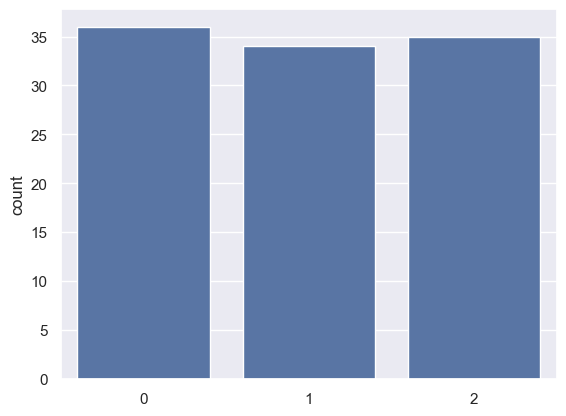

In [44]:
sns.countplot(x=y_train)
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=121,
    stratify=y
)

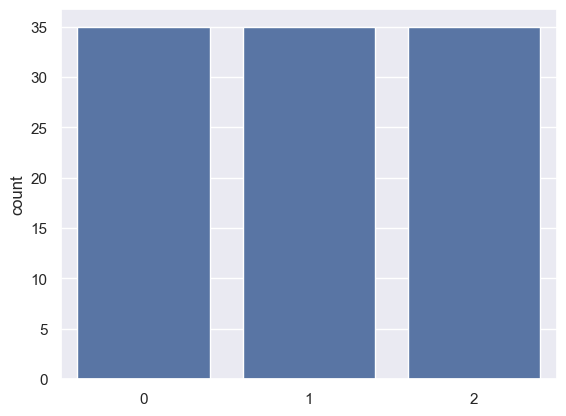

In [46]:
sns.countplot(x=y_train)
plt.show()

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    DecisionTreeClassifier(),
    X,
    y,
    scoring='accuracy',
    cv=3
)

In [49]:
import numpy as np

print(f'폴드별 정확도: {scores}')
print(f'평균 정확도: {np.mean(scores)}')

폴드별 정확도: [0.98 0.92 0.98]
평균 정확도: 0.96


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=121
)

In [51]:
parameters = {
    'max_depth': [1, 2, 3],
    'min_samples_split': [2, 3]
}

In [53]:
from sklearn.model_selection import GridSearchCV

grid_dt_clf = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=parameters,
    return_train_score=True,
    n_jobs=-1,
    cv=3
)

In [54]:
grid_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             return_train_score=True)

In [55]:
results = grid_dt_clf.cv_results_
results

{'mean_fit_time': array([0.00332618, 0.00216357, 0.00187119, 0.00400305, 0.00162657,
        0.00199437]),
 'std_fit_time': array([1.24190484e-03, 6.19255266e-04, 6.65318037e-04, 2.36351155e-03,
        3.33916850e-04, 1.52040533e-06]),
 'mean_score_time': array([0.00186102, 0.0009981 , 0.00166122, 0.00133149, 0.00133117,
        0.00099715]),
 'std_score_time': array([6.59305168e-04, 3.05531546e-06, 4.70993890e-04, 4.73618226e-04,
        4.67444593e-04, 6.25769923e-07]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_sa

In [57]:
import pandas as pd

gs_result_df = pd.DataFrame(results)
gs_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003326,0.001242,0.001861,6.593052e-04,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.650,0.675,0.65,0.658333,0.011785,5,0.6750,0.6625,0.6750,0.670833,0.005893
1,0.002164,0.000619,0.000998,3.055315e-06,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.650,0.675,0.65,0.658333,0.011785,5,0.6750,0.6625,0.6750,0.670833,0.005893
2,0.001871,0.000665,0.001661,4.709939e-04,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.975,0.950,0.85,0.925000,0.054006,3,0.9500,0.9625,0.9875,0.966667,0.015590
3,0.004003,0.002364,0.001331,4.736182e-04,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.975,0.950,0.85,0.925000,0.054006,3,0.9500,0.9625,0.9875,0.966667,0.015590
4,0.001627,0.000334,0.001331,4.674446e-04,3,2,"{'max_depth': 3, 'min_samples_split': 2}",1.000,0.950,0.85,0.933333,0.062361,1,0.9625,0.9875,0.9875,0.979167,0.011785
5,0.001994,0.000002,0.000997,6.257699e-07,3,3,"{'max_depth': 3, 'min_samples_split': 3}",1.000,0.950,0.85,0.933333,0.062361,1,0.9625,0.9875,0.9875,0.979167,0.011785


In [58]:
print(f'최고의 성능을 냈던 하이퍼 파라미터: {grid_dt_clf.best_params_}')

최고의 성능을 냈던 하이퍼 파라미터: {'max_depth': 3, 'min_samples_split': 2}


In [59]:
print(f'최고의 성능 모델의 정확도: {grid_dt_clf.best_score_}')

최고의 성능 모델의 정확도: 0.9333333333333332


In [60]:
pred = grid_dt_clf.predict(X_test)
print(f'테스트 세트의 정확도: {accuracy_score(y_test, pred)}')

테스트 세트의 정확도: 0.9666666666666667


In [61]:
best_dt_clf = grid_dt_clf.best_estimator_
best_dt_clf

DecisionTreeClassifier(max_depth=3)

In [62]:
pred = best_dt_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667

In [1]:
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

In [2]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(items)

labels = encoder.transform(items)

In [5]:
print(f'인코딩 변환 값: {labels}')
print(f'인코딩 클래스: {encoder.classes_}')

인코딩 변환 값: [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [6]:
encoder.inverse_transform([5, 4, 3, 2, 0, 1])

array(['컴퓨터', '전자렌지', '선풍기', '믹서', 'TV', '냉장고'], dtype='<U4')

In [8]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items_arr = np.array(items).reshape(-1, 1)
items_arr

array([['TV'],
       ['냉장고'],
       ['전자렌지'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서'],
       ['믹서']], dtype='<U4')

In [9]:
encoder = OneHotEncoder()

ohe_labels = encoder.fit_transform(items_arr)

In [10]:
print(ohe_labels)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0


In [11]:
print(ohe_labels.toarray())

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [12]:
import pandas as pd
movie_score = pd.DataFrame({
    'naver':[0, 2, 4, 6, 8],
    'netflix':[1, 2, 3, 4, 5]
})

movie_score

,naver,netflix
0,0,1
1,2,2
2,4,3
3,6,4
4,8,5


In [13]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
movie_score_scaled = mm_scaler.fit_transform(movie_score)
movie_score_scaled

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [14]:
data1 = np.array([100, 110, 120, 130, 140])
data2 = np.array([0, 1, 2, 3, 4])

In [15]:
data1.mean(), data1.var(), data1.std()

(120.0, 200.0, 14.142135623730951)

In [16]:
data2.mean(), data2.var(), data2.std()

(2.0, 2.0, 1.4142135623730951)

In [17]:
from sklearn.preprocessing import StandardScaler

std_scaler1 = StandardScaler()
std_scaler2 = StandardScaler()

In [19]:
data1_scaled = std_scaler1.fit_transform(data1.reshape(-1, 1))
data2_scaled = std_scaler2.fit_transform(data2.reshape(-1, 1))

In [20]:
print(data1_scaled)
print()
print(data2_scaled)

[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]

[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


In [22]:
data1_scaled.mean(), data1_scaled.std()

(0.0, 0.9999999999999999)

In [23]:
data2_scaled.mean(), data2_scaled.std()

(0.0, 0.9999999999999999)

In [24]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

In [25]:
cancer = load_breast_cancer()

data = cancer.data
target = cancer.target
feature_names = cancer.feature_names

df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [26]:
tumor = df.loc[df['target'] == 1].copy()
cancer = df.loc[df['target'] == 0].copy()

## Q.이 사람이 암인가?
tumor['target'] = 0
cancer['target'] = 1

sample = pd.concat([tumor, cancer[:30]], sort=True)
sample.head()

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
19,23.560,0.014600,0.013150,0.02387,0.002300,566.3,0.08129,0.047810,0.06664,0.05766,...,711.2,0.17730,0.12880,0.23900,0.07259,99.70,15.110,0.14400,0.2977,19.26
20,14.670,0.018980,0.006490,0.01698,0.002425,520.0,0.12700,0.031100,0.04568,0.06811,...,630.5,0.27760,0.07283,0.18900,0.08183,96.09,14.500,0.13120,0.3184,20.49
21,15.700,0.014320,0.014210,0.01985,0.002968,273.9,0.06492,0.020760,0.02956,0.06905,...,314.9,0.11480,0.06227,0.08867,0.07773,65.13,10.230,0.13240,0.2450,15.66
37,14.160,0.004899,0.011640,0.01343,0.001777,523.8,0.03766,0.029230,0.02562,0.05863,...,545.9,0.04619,0.05013,0.04833,0.06169,84.46,13.300,0.09701,0.1987,22.81
46,8.205,0.016460,0.005917,0.01588,0.002582,201.9,0.05943,0.005917,0.01588,0.06503,...,242.2,0.13570,0.02564,0.06880,0.07409,57.26,8.964,0.12970,0.3105,21.96


In [27]:
sample['target'].value_counts()

target
0    357
1     30
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    sample.drop('target', axis=1),
    sample['target'],
    random_state=42
)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [31]:
from sklearn.metrics import accuracy_score

lr_pred = model.predict(X_test)
accuracy_score(lr_pred, y_test)

0.9690721649484536

In [32]:
dolpal_pred = np.zeros_like(y_test)
dolpal_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [33]:
accuracy_score(dolpal_pred, y_test)

0.9072164948453608

In [37]:
from sklearn.metrics import confusion_matrix

lr_conf_matrix = confusion_matrix(y_test, lr_pred)
print(f'모델의 오차 행렬: \n {lr_conf_matrix}')

dolpal_conf_matrix = confusion_matrix(y_test, dolpal_pred)
print(f'돌팔이의 오차 행렬: \n {dolpal_conf_matrix}')

모델의 오차 행렬: 
 [[87  1]
 [ 2  7]]
돌팔이의 오차 행렬: 
 [[88  0]
 [ 9  0]]


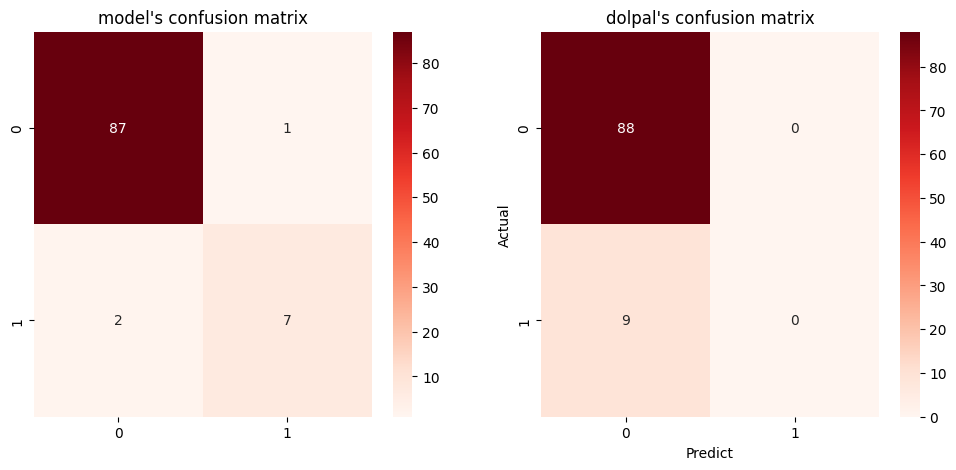

In [39]:
## ((cf))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(121)
lr_conf_result = confusion_matrix(y_test, lr_pred)
ax = sns.heatmap(
    lr_conf_result,
    annot=True,
    cmap="Reds"
)
ax.set_title("model's confusion matrix")

plt.subplot(122)
dolpal_conf_result = confusion_matrix(y_test, dolpal_pred)
ax = sns.heatmap(
    dolpal_conf_result,
    annot=True,
    cmap="Reds",
)

ax.set_title("dolpal's confusion matrix")

plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [42]:
from sklearn.metrics import precision_score, recall_score

print(f'모델의 정밀도: {precision_score(y_test, lr_pred)}')
print(f'모델의 재현율: {recall_score(y_test, lr_pred)}')

print(f'돌팔이의 정밀도: {precision_score(y_test, dolpal_pred)}')
print(f'돌팔이의 재현율: {recall_score(y_test, dolpal_pred)}')

모델의 정밀도: 0.875
모델의 재현율: 0.7777777777777778
돌팔이의 정밀도: 0.0
돌팔이의 재현율: 0.0


C:\Users\YANG EUN SEO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, lr_pred)
f1

0.8235294117647058

In [45]:
pred_proba = model.predict_proba(X_test)
pred_proba

array([[9.99267572e-01, 7.32428229e-04],
       [9.99309899e-01, 6.90100844e-04],
       [9.99999986e-01, 1.37716518e-08],
       [9.99971518e-01, 2.84820534e-05],
       [9.99999999e-01, 1.35957505e-09],
       [9.99971987e-01, 2.80133838e-05],
       [9.99862865e-01, 1.37135462e-04],
       [9.99999834e-01, 1.65914256e-07],
       [9.99956725e-01, 4.32747610e-05],
       [1.00000000e+00, 1.66200522e-11],
       [8.22944202e-01, 1.77055798e-01],
       [1.00000000e+00, 3.82719708e-16],
       [9.99993692e-01, 6.30799564e-06],
       [1.00000000e+00, 8.61361984e-12],
       [1.54947354e-03, 9.98450526e-01],
       [9.99989181e-01, 1.08193905e-05],
       [9.99928187e-01, 7.18134221e-05],
       [9.99999725e-01, 2.74808978e-07],
       [1.00000000e+00, 4.80913218e-11],
       [9.98509926e-01, 1.49007441e-03],
       [9.99999913e-01, 8.68278621e-08],
       [9.99999884e-01, 1.15772600e-07],
       [9.99999459e-01, 5.41374045e-07],
       [9.99999987e-01, 1.26762995e-08],
       [9.999999

In [46]:
from sklearn.preprocessing import Binarizer

sample_X = [[0.1, 0.7],
            [1.1, 0.0],
            [0.0, 1.2]]

binarizer = Binarizer(threshold=0.8)
binarizer.fit_transform(sample_X)

array([[0., 0.],
       [1., 0.],
       [0., 1.]])

In [49]:
custom_threshold = 0.5

pred_proba_1 = model.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
pred_proba_1

array([[7.32428229e-04],
       [6.90100844e-04],
       [1.37716518e-08],
       [2.84820534e-05],
       [1.35957505e-09],
       [2.80133838e-05],
       [1.37135462e-04],
       [1.65914256e-07],
       [4.32747610e-05],
       [1.66200522e-11],
       [1.77055798e-01],
       [3.82719708e-16],
       [6.30799564e-06],
       [8.61361984e-12],
       [9.98450526e-01],
       [1.08193905e-05],
       [7.18134221e-05],
       [2.74808978e-07],
       [4.80913218e-11],
       [1.49007441e-03],
       [8.68278621e-08],
       [1.15772600e-07],
       [5.41374045e-07],
       [1.26762995e-08],
       [4.13564969e-09],
       [6.73681104e-14],
       [1.57345466e-11],
       [5.06539400e-11],
       [5.86835261e-10],
       [1.10455217e-05],
       [1.00000000e+00],
       [4.07850262e-06],
       [4.04421780e-05],
       [1.90418068e-07],
       [1.59195110e-08],
       [8.92140051e-12],
       [1.05525321e-09],
       [3.03330445e-09],
       [1.48366337e-06],
       [2.36853405e-05],


In [50]:
binarizer = Binarizer(threshold=custom_threshold)

custom_predict = binarizer.fit_transform(pred_proba_1)
custom_predict

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

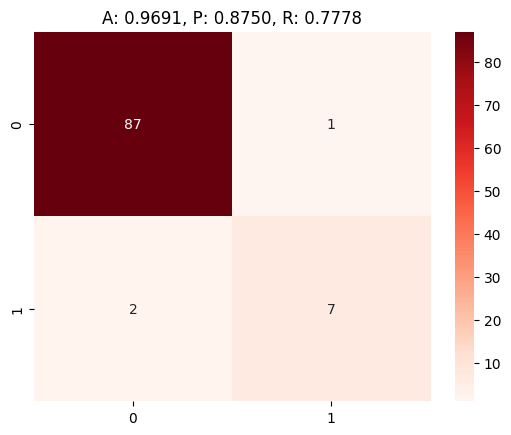

In [52]:
## ((cf))
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test, pred, ax=None):
  confusion = confusion_matrix( y_test, pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  accuracy = accuracy_score(y_test, pred)
  hmap_ax = sns.heatmap(
    confusion,
    annot=True,
    cmap="Reds",
    ax=ax
  )
  hmap_ax.set_title('A: {0:.4f}, P: {1:.4f}, R: {2:.4f}'.format(accuracy , precision ,recall))

get_clf_eval(y_test, custom_predict)

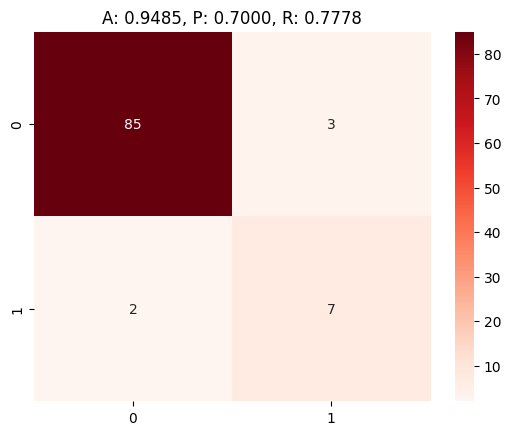

In [53]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.1

pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

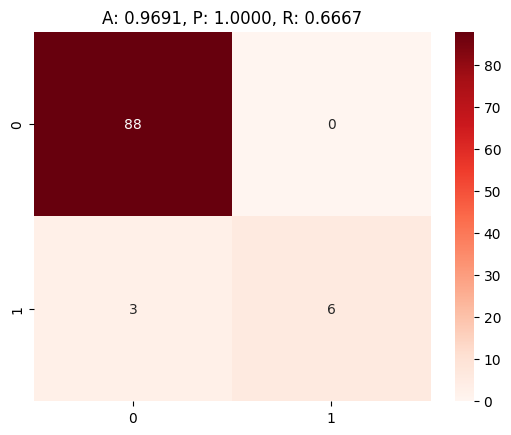

In [54]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.8

pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

C:\Users\YANG EUN SEO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


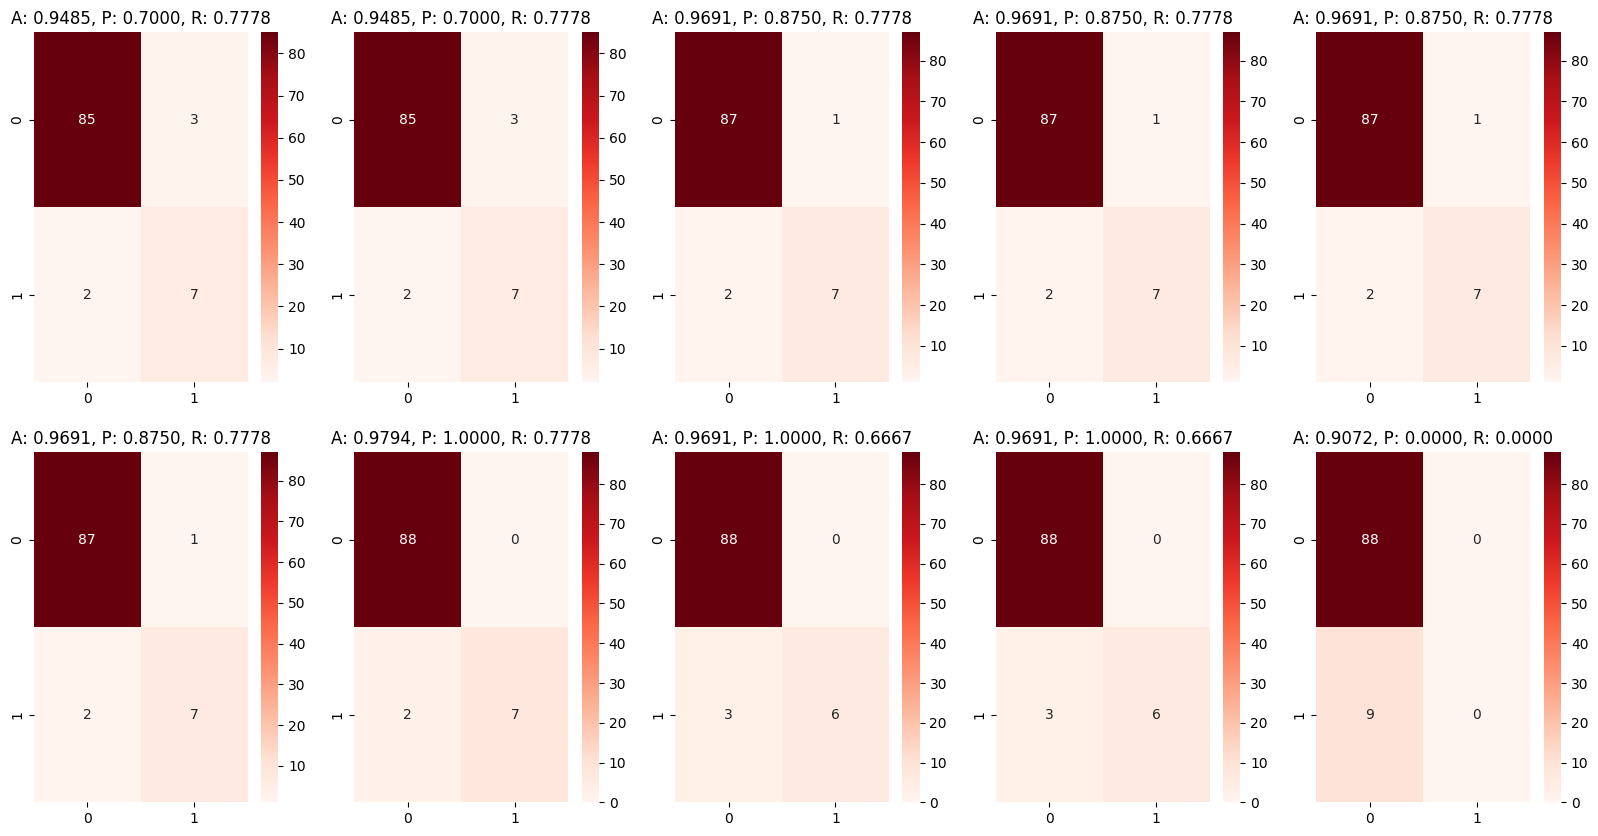

In [56]:
## ((cf))
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    fig, axes = plt.subplots(nrows=2, ncols=5)
    fig.set_figwidth(20)
    fig.set_figheight(10)
    for custom_threshold, ax in zip(thresholds, axes.ravel()):
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)

        custom_predict = binarizer.transform(pred_proba)
        get_clf_eval(y_test, custom_predict, ax)

thresholds = [0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

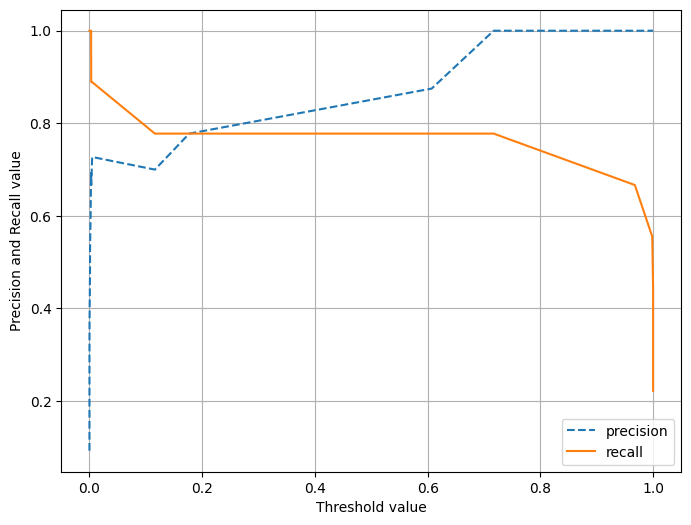

In [57]:
## ((cf))
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot( y_test, model.predict_proba(X_test)[:, 1] )
